Initial Sentiment Analysis (partial Task 2)


Loaded 1266 sentiment-analyzed reviews


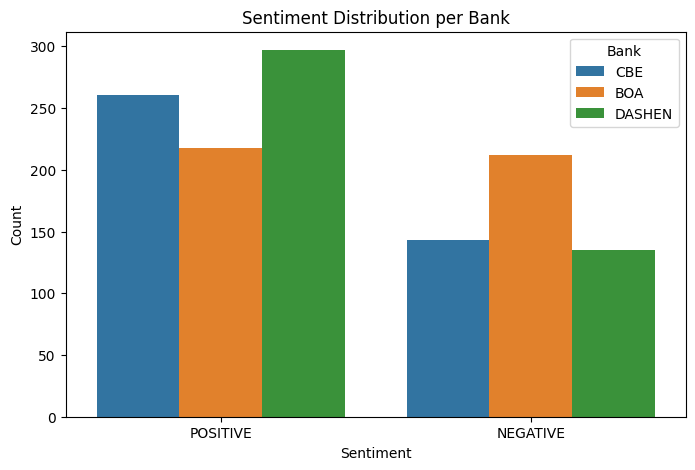

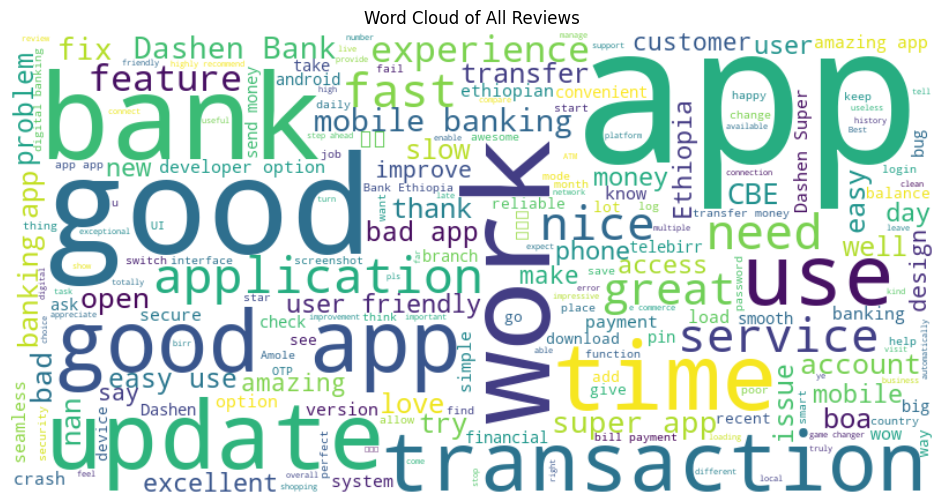

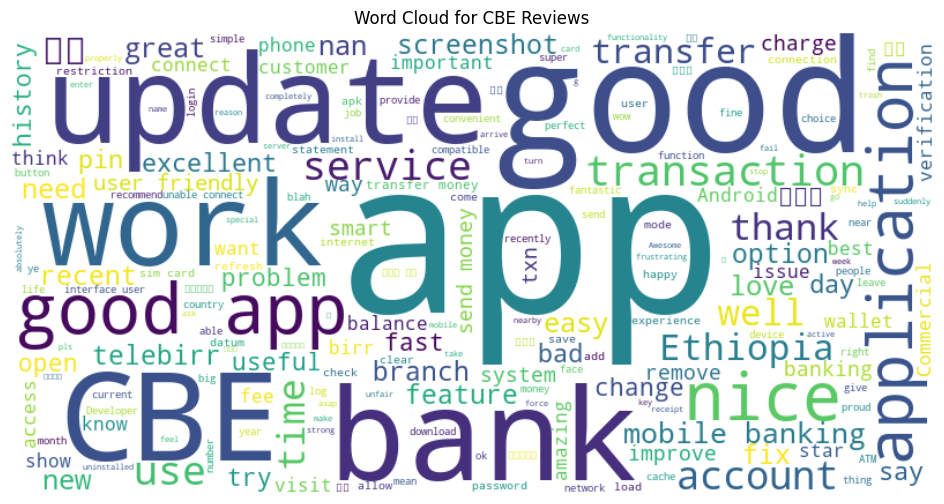

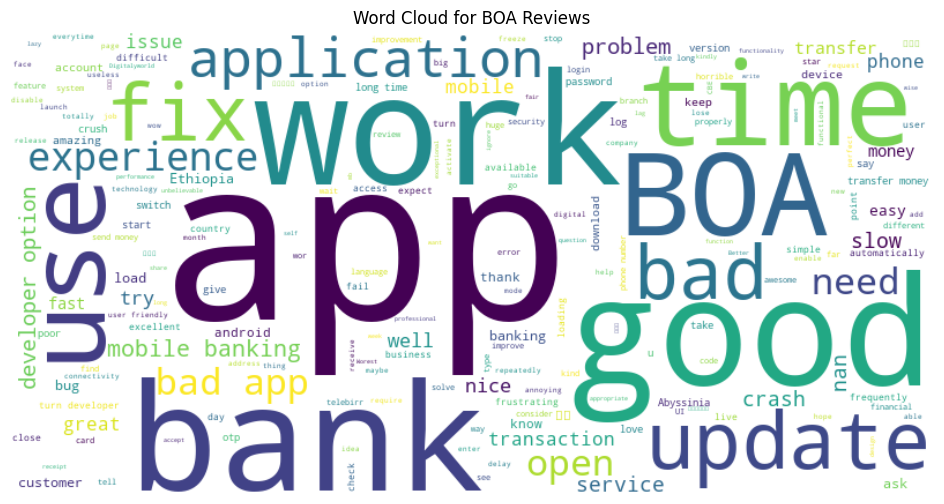

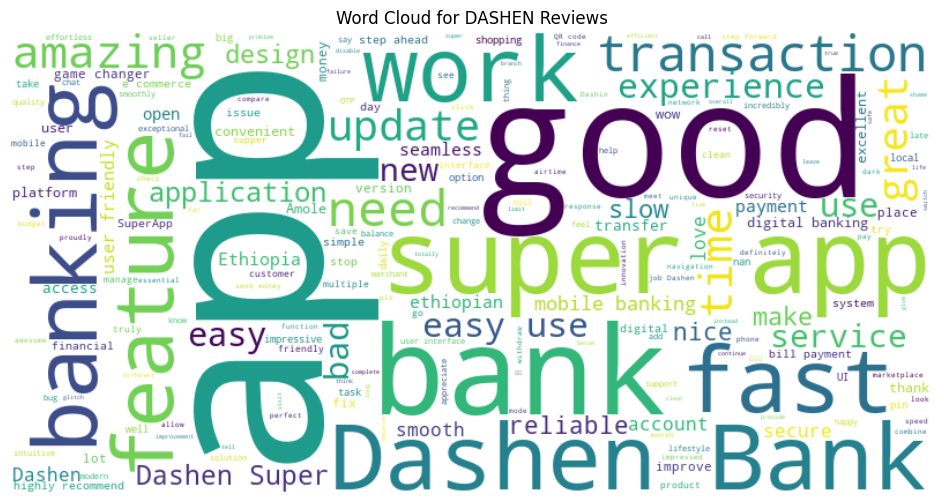

In [ ]:
# --- Setup and imports ---
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure project root is in Python path
project_root = r"E:\10 academy\weak2\fintech-review-analytics"  # Change if needed
os.chdir(project_root)
sys.path.append(project_root)

# Import config
from config.config import ANALYSIS_CSV_PATH

# --- Load data ---
df = pd.read_csv(ANALYSIS_CSV_PATH)
print(f"Loaded {len(df)} sentiment-analyzed reviews")

# --- Sentiment distribution per bank ---
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment', hue='bank', data=df)
plt.title("Sentiment Distribution per Bank")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title="Bank")
plt.show()

# --- Overall word cloud ---
all_text = " ".join(df['cleaned'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Reviews")
plt.show()

# --- Word clouds per bank ---
banks = df['bank'].unique()
for bank in banks:
    bank_text = " ".join(df[df['bank'] == bank]['cleaned'].astype(str))
    bank_wc = WordCloud(width=800, height=400, background_color='white').generate(bank_text)
    
    plt.figure(figsize=(12,6))
    plt.imshow(bank_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {bank} Reviews")
    plt.show()
